In [1383]:
import os
import cv2
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
from os import mkdir,path
from shutil import rmtree
import matplotlib.pyplot as plt
# %matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## prepare folders

In [1384]:
if path.isdir('test'):
    rmtree('test')
if path.isdir('results'):
    rmtree('results')

In [1385]:
mkdir('test')
mkdir('results')

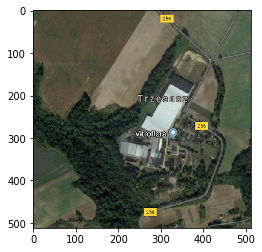

In [1386]:
small_image=Image.open('data/5_small.png').convert('RGB')
small_image.save('test/small.png')

big_image=Image.open('data/5_big.png').convert('RGB')
big_image_cv2_plis=cv2.imread('data/5_big.png')

plt.imshow(big_image)

## transforms

In [1387]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms_small = transforms.Compose([
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    normalize
])

data_transforms_big = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

In [1388]:
big_image_transform=data_transforms_big(big_image)
plt.imsave('test/big.png',big_image_transform.numpy()[0])

big_image_transform=big_image_transform.numpy().transpose(1, 2, 0)
big_image_transform=big_image_transform.astype(np.float32)


In [1389]:
small_images_torch=[]

In [1390]:
for rotate_angle in range(0,360,10):
    small_image_transform=small_image.resize((85,85),Image.ANTIALIAS).rotate(rotate_angle)
    small_image_transform.save('test/zzz{}.png'.format(rotate_angle))
    
    small_image_torch = data_transforms_small(small_image_transform)
    
    if rotate_angle%20==0:
        plt.imsave('test/test-{}.png'.format(rotate_angle),small_image_torch.numpy()[0])
        
    
    small_images_torch.append(small_image_torch.unsqueeze(0))

## cv2 template

In [1391]:
for torch_image in small_images_torch:
    template_image=torch_image[0].numpy().transpose(1, 2, 0)
    template_image=template_image.astype(np.float32)
    
    w, h = template_image.shape[:-1]
    
    result = cv2.matchTemplate(big_image_transform, template_image, cv2.TM_CCOEFF_NORMED)
  
    threshold = 0.5
    loc = np.where(result >= threshold)
    
    for pt in zip(*loc[::-1]):  # Switch collumns and rows
#         print(pt)
        cv2.rectangle(big_image_cv2_plis, pt, (pt[0]+ h, pt[1]+ w),(255, 0, 0), 1)
        

In [1392]:
# big_image

In [1393]:
cv2.imwrite('results/finall_image.png', big_image_cv2_plis)

True

In [1394]:
print('end')

end
